In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import scorecardpy as sc
import os
import sys
os.chdir('..')
from scripts.utils import features

In [2]:
df=pd.read_csv('data/data.csv')
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


In [3]:
df['TransactionStartTime']=pd.to_datetime(df['TransactionStartTime'])
recency_df = df.groupby(by='CustomerId', 
						as_index=False)['TransactionStartTime'].max()
recency_df.columns = ['CustomerId', 'LastPurchaseDate']
recent_date = recency_df['LastPurchaseDate'].max()
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
recency_df


,CustomerId,LastPurchaseDate,Recency
0,CustomerId_1,2018-11-21 16:49:14+00:00,83
1,CustomerId_10,2018-11-21 16:49:09+00:00,83
2,CustomerId_1001,2018-11-16 08:20:39+00:00,89
3,CustomerId_1002,2019-01-18 10:05:00+00:00,25
4,CustomerId_1003,2019-02-01 15:04:51+00:00,11
...,...,...,...
3737,CustomerId_992,2019-02-08 10:27:42+00:00,4
3738,CustomerId_993,2019-01-18 15:56:30+00:00,25
3739,CustomerId_994,2019-02-12 11:17:08+00:00,0
3740,CustomerId_996,2018-12-07 15:24:31+00:00,67


In [4]:
frequency_df = df.drop_duplicates().groupby(
	by=['CustomerId'], as_index=False)['TransactionStartTime'].count()
frequency_df.columns = ['CustomerId', 'Frequency']
frequency_df


,CustomerId,Frequency
0,CustomerId_1,1
1,CustomerId_10,1
2,CustomerId_1001,5
3,CustomerId_1002,11
4,CustomerId_1003,6
...,...,...
3737,CustomerId_992,6
3738,CustomerId_993,5
3739,CustomerId_994,101
3740,CustomerId_996,17


In [5]:
monetary_df = df.groupby(by='CustomerId', as_index=False)['Amount'].sum()
monetary_df.columns = ['CustomerId', 'Monetary']
monetary_df


,CustomerId,Monetary
0,CustomerId_1,-10000.0
1,CustomerId_10,-10000.0
2,CustomerId_1001,20000.0
3,CustomerId_1002,4225.0
4,CustomerId_1003,20000.0
...,...,...
3737,CustomerId_992,20000.0
3738,CustomerId_993,20000.0
3739,CustomerId_994,543873.0
3740,CustomerId_996,139000.0


In [6]:

std_df = df.groupby(by='CustomerId', as_index=False)['Amount'].std()
std_df.columns = ['CustomerId', 'Standard Deviation']
std_df.fillna(0,inplace=True)
std_df


,CustomerId,Standard Deviation
0,CustomerId_1,0.000000
1,CustomerId_10,0.000000
2,CustomerId_1001,6558.963333
3,CustomerId_1002,560.498966
4,CustomerId_1003,6030.478146
...,...,...
3737,CustomerId_992,6088.240030
3738,CustomerId_993,6745.368782
3739,CustomerId_994,14800.656784
3740,CustomerId_996,4433.329648


In [7]:
rf_df=pd.merge(recency_df,frequency_df,on='CustomerId' )
rfm_df=pd.merge(rf_df,monetary_df,on='CustomerId')
rfms_df=pd.merge(rfm_df,std_df,on='CustomerId')

In [8]:
rfms_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [9]:
# Ranking the customers based on Recency, Frequency, Monetary, and Standard Deviation
rfms_df['R_rank'] = rfms_df['Recency'].rank(ascending=False)
rfms_df['F_rank'] = rfms_df['Frequency'].rank(ascending=True)
rfms_df['M_rank'] = rfms_df['Monetary'].rank(ascending=True)
rfms_df['S_rank'] = rfms_df['Standard Deviation'].rank(ascending=False)

# Normalizing the rank of the customers
rfms_df['R_rank_norm'] = (rfms_df['R_rank'] / rfms_df['R_rank'].max()) * 100
rfms_df['F_rank_norm'] = (rfms_df['F_rank'] / rfms_df['F_rank'].max()) * 100
rfms_df['M_rank_norm'] = (rfms_df['M_rank'] / rfms_df['M_rank'].max()) * 100
rfms_df['S_rank_norm'] = (rfms_df['S_rank'] / rfms_df['S_rank'].max()) * 100


In [10]:
rfms_df.drop(columns=['R_rank', 'F_rank', 'M_rank','S_rank'], inplace=True)

In [11]:
rfms_df['RFMS_Score']=0.10*rfms_df['R_rank_norm']+ 0.20*rfms_df['F_rank_norm'] + 0.60*rfms_df['M_rank_norm']+ 0.10*rfms_df['S_rank_norm']
rfms_df['RFMS_Score'].max()

np.float64(93.81142312290406)

In [12]:
rfms_df.drop(['R_rank_norm','F_rank_norm','M_rank_norm','S_rank_norm'],axis=1,inplace=True)

In [13]:
rfms_df

,CustomerId,Recency,Frequency,Monetary,Standard Deviation,RFMS_Score
0,CustomerId_1,83,1,-10000.0,0.000000,13.601160
1,CustomerId_10,83,1,-10000.0,0.000000,13.601160
2,CustomerId_1001,89,5,20000.0,6558.963333,40.873267
3,CustomerId_1002,25,11,4225.0,560.498966,40.943508
4,CustomerId_1003,11,6,20000.0,6030.478146,49.642411
...,...,...,...,...,...,...
3737,CustomerId_992,4,6,20000.0,6088.240030,51.125077
3738,CustomerId_993,25,5,20000.0,6745.368782,45.469739
3739,CustomerId_994,0,101,543873.0,14800.656784,87.209013
3740,CustomerId_996,67,17,139000.0,4433.329648,71.231889


In [14]:
refined_df=df.merge(rfms_df,on='CustomerId',how='left')
refined_df['RiskResult']=refined_df['RFMS_Score'].apply(lambda x:1 if x < 70 else 0)
refined_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,TransactionStartTime,PricingStrategy,FraudResult,Recency,Frequency,Monetary,Standard Deviation,RFMS_Score,RiskResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2018-11-15 02:18:49+00:00,2,0,0,119,109921.75,3042.294251,83.580756,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2018-11-15 02:19:08+00:00,2,0,0,119,109921.75,3042.294251,83.580756,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500,2018-11-15 02:44:21+00:00,2,0,81,2,1000.00,0.000000,23.209022,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,21800,2018-11-15 03:32:55+00:00,2,0,5,38,228727.20,17169.241610,79.661047,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,644,2018-11-15 03:34:21+00:00,2,0,5,38,228727.20,17169.241610,79.661047,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,...,1000,2019-02-13 09:54:09+00:00,2,0,0,573,2438140.00,22554.029939,90.151659,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2019-02-13 09:54:25+00:00,2,0,0,43,58499.60,2274.756582,75.070252,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2019-02-13 09:54:35+00:00,2,0,0,43,58499.60,2274.756582,75.070252,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,...,3000,2019-02-13 10:01:10+00:00,2,0,0,524,851985.00,3207.920536,93.811423,0


In [15]:
refined_df['RiskResult'].value_counts()

RiskResult
0    71238
1    24424
Name: count, dtype: int64

In [16]:
cat=refined_df.select_dtypes(include=['object'])
encoder=LabelEncoder()
for i in cat:
    refined_df[i]=encoder.fit_transform(refined_df[i])
refined_df


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,TransactionStartTime,PricingStrategy,FraudResult,Recency,Frequency,Monetary,Standard Deviation,RFMS_Score,RiskResult
0,78150,46980,2490,3535,2584,0,256,5,1,0,...,1000,2018-11-15 02:18:49+00:00,2,0,0,119,109921.75,3042.294251,83.580756,0
1,75821,31755,3219,2366,2584,0,256,3,19,2,...,20,2018-11-15 02:19:08+00:00,2,0,0,119,109921.75,3042.294251,83.580756,0
2,39888,60272,2713,996,2806,0,256,5,0,0,...,500,2018-11-15 02:44:21+00:00,2,0,81,2,1000.00,0.000000,23.209022,1
3,48738,1797,3351,974,3733,0,256,0,11,8,...,21800,2018-11-15 03:32:55+00:00,2,0,5,38,228727.20,17169.241610,79.661047,0
4,41364,48941,3219,2366,3733,0,256,3,19,2,...,644,2018-11-15 03:34:21+00:00,2,0,5,38,228727.20,17169.241610,79.661047,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,88055,92361,3219,2366,1504,0,256,3,19,2,...,1000,2019-02-13 09:54:09+00:00,2,0,0,573,2438140.00,22554.029939,90.151659,0
95658,89318,46175,2055,1349,2154,0,256,5,1,0,...,1000,2019-02-13 09:54:25+00:00,2,0,0,43,58499.60,2274.756582,75.070252,0
95659,82370,13891,3219,2366,2154,0,256,3,19,2,...,20,2019-02-13 09:54:35+00:00,2,0,0,43,58499.60,2274.756582,75.070252,0
95660,27556,73014,296,3344,521,0,256,5,8,7,...,3000,2019-02-13 10:01:10+00:00,2,0,0,524,851985.00,3207.920536,93.811423,0


In [17]:
refined_df=features(refined_df)
refined_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,RFMS_Score,RiskResult,Hour,Day,Month,Year,TotalTransactionAmount,AverageTransactionAmount,TransactionCount,TransactionStd
0,78150,46980,2490,3535,2584,0,256,5,1,0,...,83.580756,0,2,15,11,2018,156884.0,2377.030303,66,3146.231284
1,75821,31755,3219,2366,2584,0,256,3,19,2,...,83.580756,0,2,15,11,2018,-27750277.5,-898.270725,30893,1845.812752
2,39888,60272,2713,996,2806,0,256,5,0,0,...,23.209022,1,2,15,11,2018,1000.0,500.000000,2,0.000000
3,48738,1797,3351,974,3733,0,256,0,11,8,...,79.661047,0,3,15,11,2018,251000.0,9653.846154,26,19707.241933
4,41364,48941,3219,2366,3733,0,256,3,19,2,...,79.661047,0,3,15,11,2018,-27750277.5,-898.270725,30893,1845.812752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,88055,92361,3219,2366,1504,0,256,3,19,2,...,90.151659,0,9,13,2,2019,-27750277.5,-898.270725,30893,1845.812752
95658,89318,46175,2055,1349,2154,0,256,5,1,0,...,75.070252,0,9,13,2,2019,60208.0,2229.925926,27,2492.887450
95659,82370,13891,3219,2366,2154,0,256,3,19,2,...,75.070252,0,9,13,2,2019,-27750277.5,-898.270725,30893,1845.812752
95660,27556,73014,296,3344,521,0,256,5,8,7,...,93.811423,0,10,13,2,2019,924919.0,2642.625714,350,3384.271147


[INFO] filtering variables ...
Variable filtering on 95662 rows and 30 columns in 00:02:35 
8 variables are removed
[INFO] creating woe binning ...


c:\Users\abenet\Desktop\Trial\Credit-Risk-Analysis\.venv\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\abenet\Desktop\Trial\Credit-Risk-Analysis\.venv\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\abenet\Desktop\Trial\Credit-Risk-Analysis\.venv\Lib\site-packages\scorecardpy\woebin.py:320: FutureWarning: The default of o

Binning on 95662 rows and 22 columns in 00:00:18


c:\Users\abenet\Desktop\Trial\Credit-Risk-Analysis\.venv\Lib\site-packages\scorecardpy\woebin.py:1225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


{'ProductCategory': <Figure size 640x480 with 2 Axes>,
 'ChannelId': <Figure size 640x480 with 2 Axes>,
 'Recency': <Figure size 640x480 with 2 Axes>,
 'Amount': <Figure size 640x480 with 2 Axes>,
 'ProductId': <Figure size 640x480 with 2 Axes>,
 'Day': <Figure size 640x480 with 2 Axes>,
 'Frequency': <Figure size 640x480 with 2 Axes>,
 'SubscriptionId': <Figure size 640x480 with 2 Axes>,
 'Monetary': <Figure size 640x480 with 2 Axes>,
 'PricingStrategy': <Figure size 640x480 with 2 Axes>,
 'Value': <Figure size 640x480 with 2 Axes>,
 'Hour': <Figure size 640x480 with 2 Axes>,
 'TotalTransactionAmount': <Figure size 640x480 with 2 Axes>,
 'Standard Deviation': <Figure size 640x480 with 2 Axes>,
 'AverageTransactionAmount': <Figure size 640x480 with 2 Axes>,
 'TransactionStd': <Figure size 640x480 with 2 Axes>,
 'CustomerId': <Figure size 640x480 with 2 Axes>,
 'RFMS_Score': <Figure size 640x480 with 2 Axes>,
 'AccountId': <Figure size 640x480 with 2 Axes>,
 'ProviderId': <Figure size 6

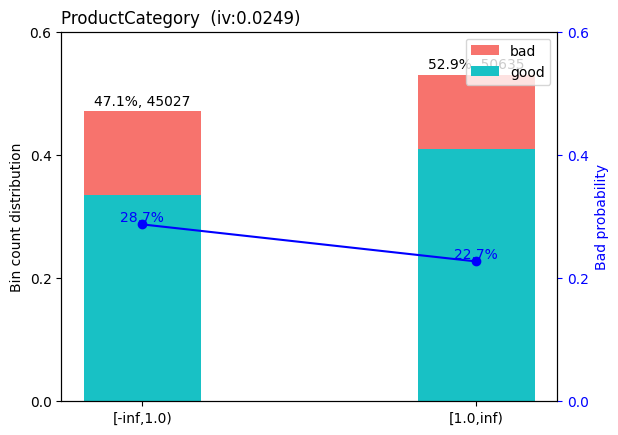

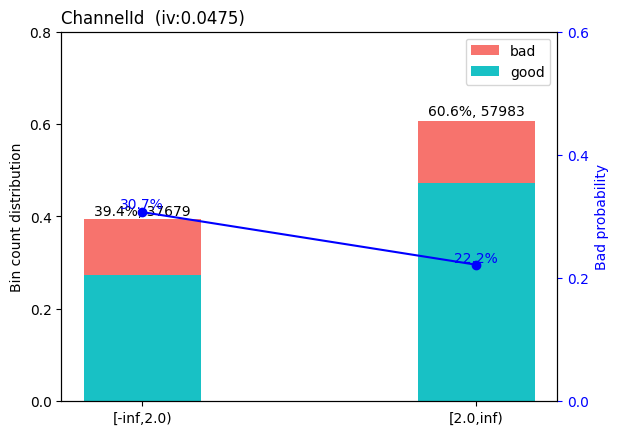

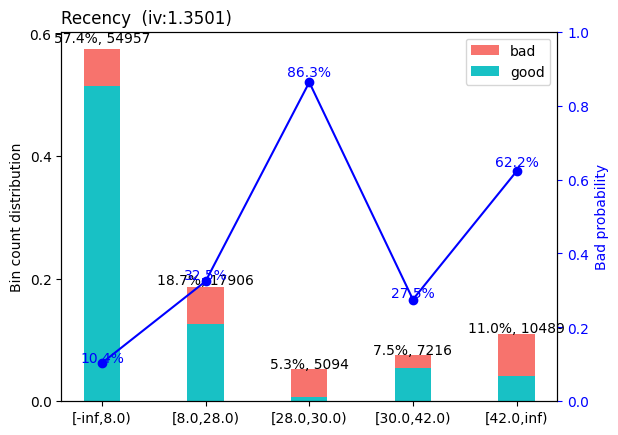

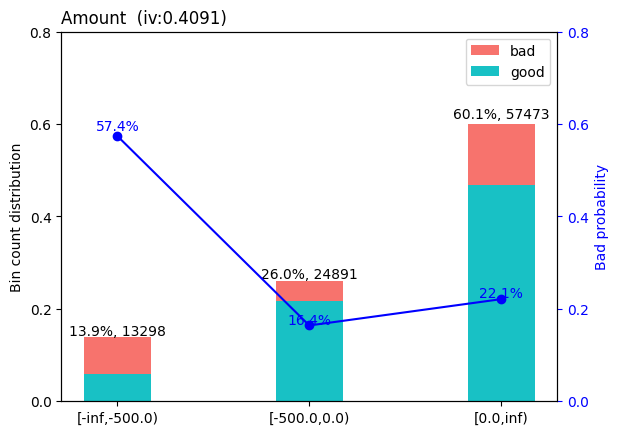

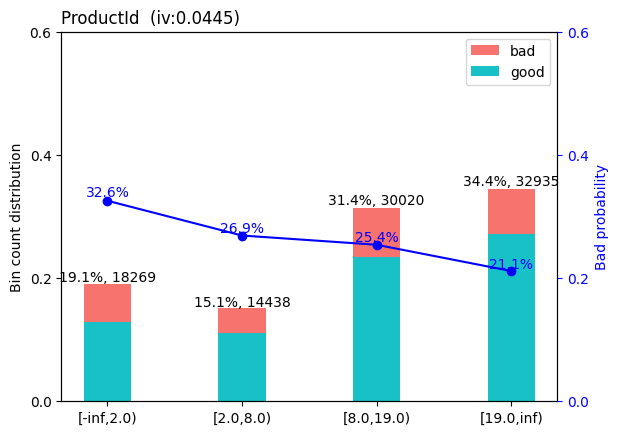

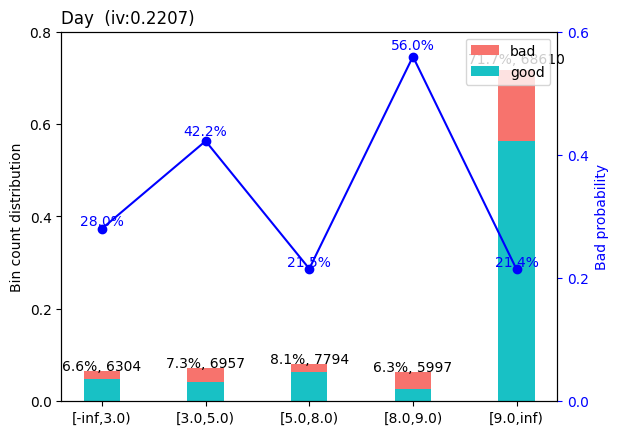

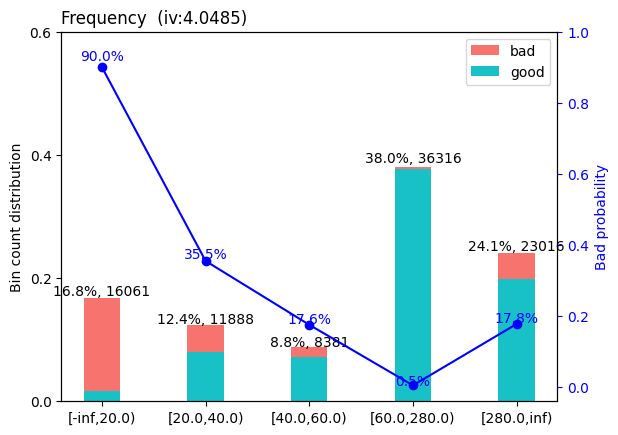

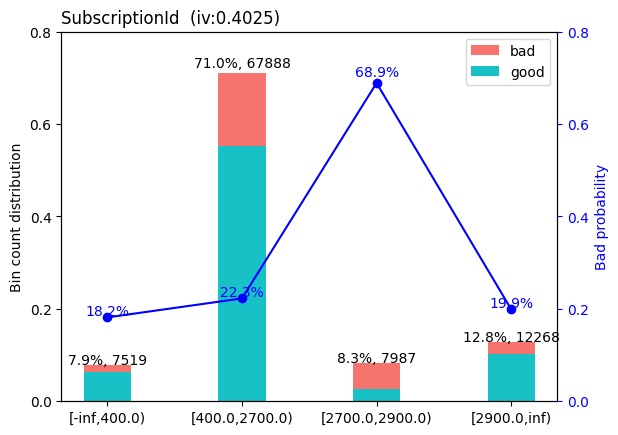

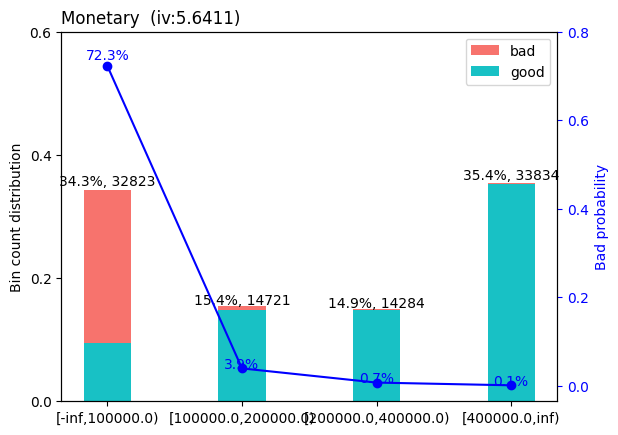

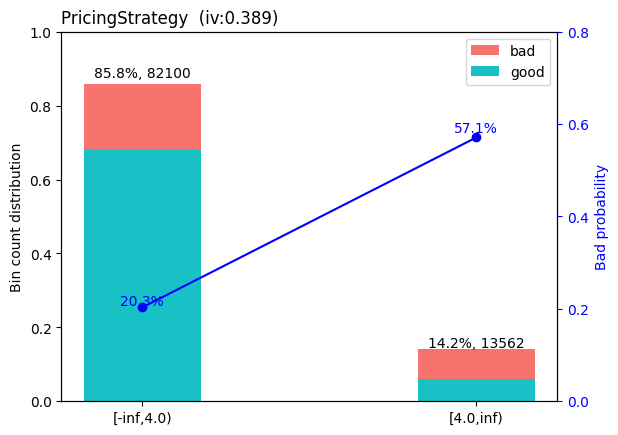

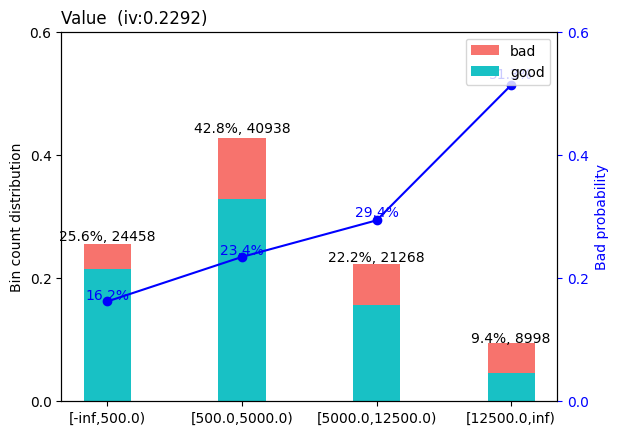

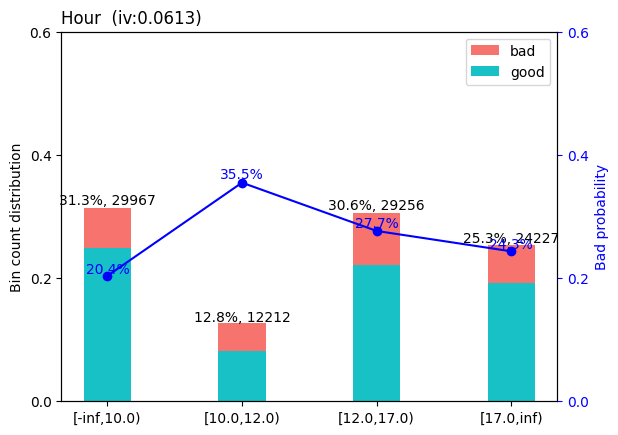

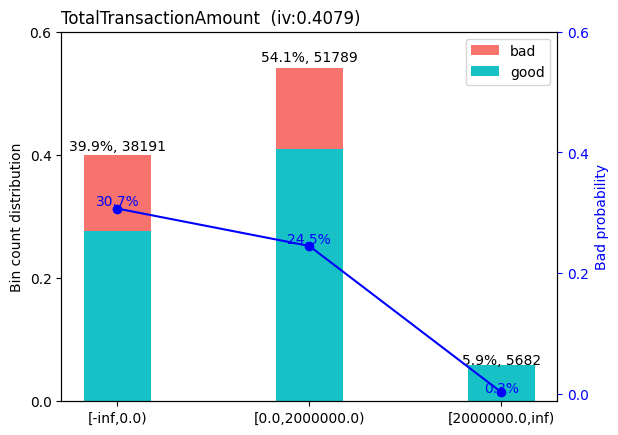

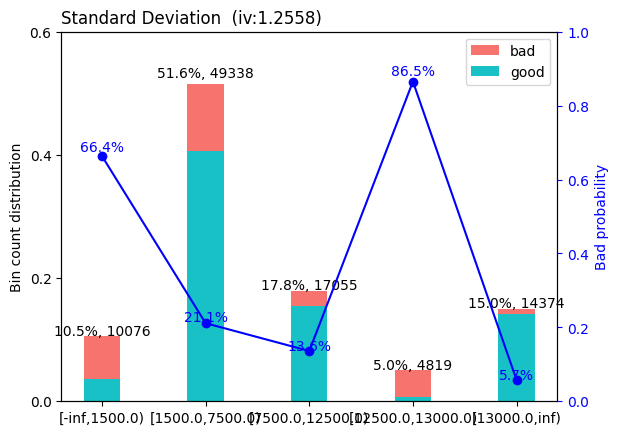

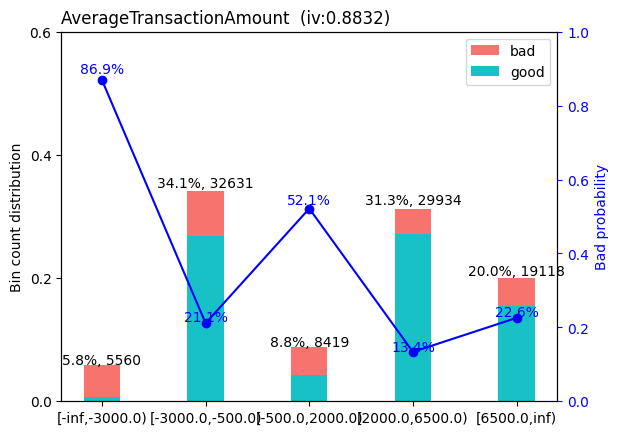

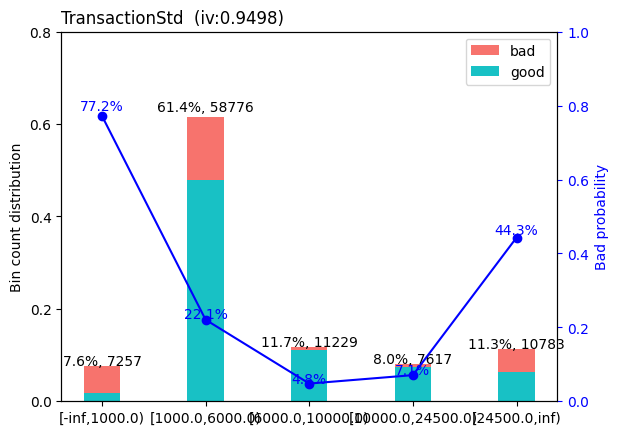

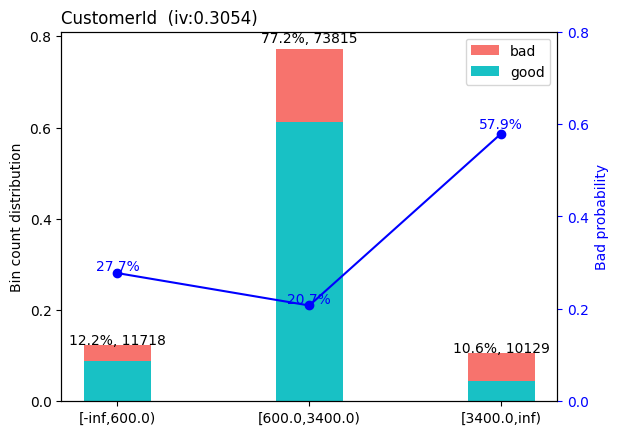

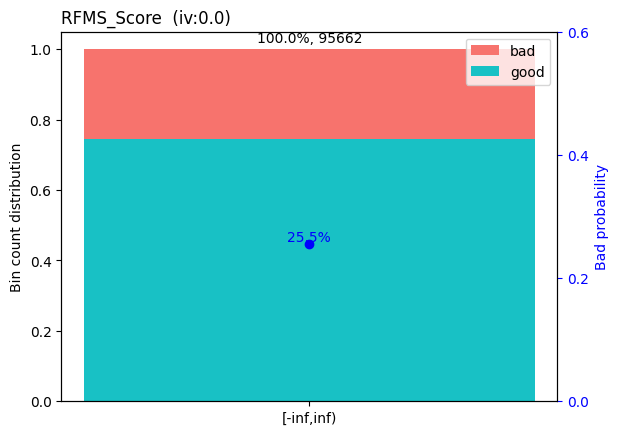

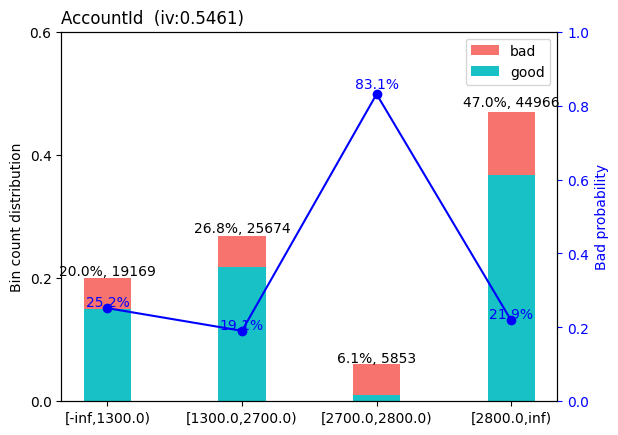

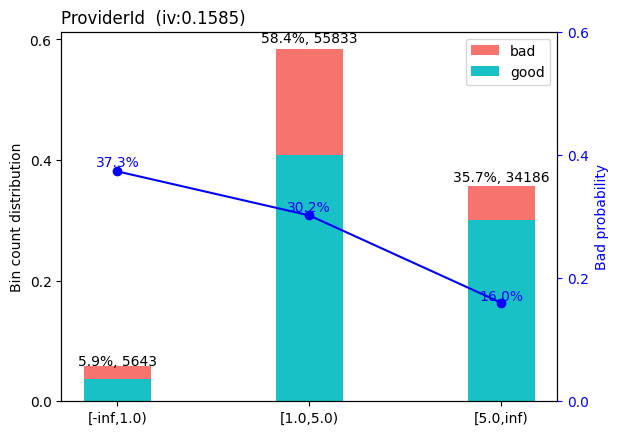

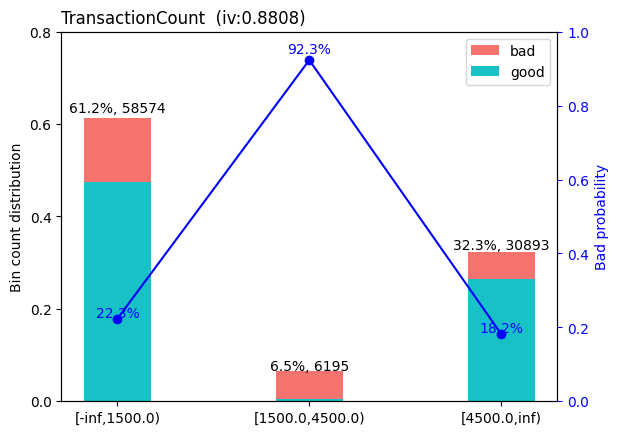

In [18]:
dt_s=sc.var_filter(refined_df,y='RiskResult')
bins=sc.woebin(dt_s,y='RiskResult')
sc.woebin_plot(bins)

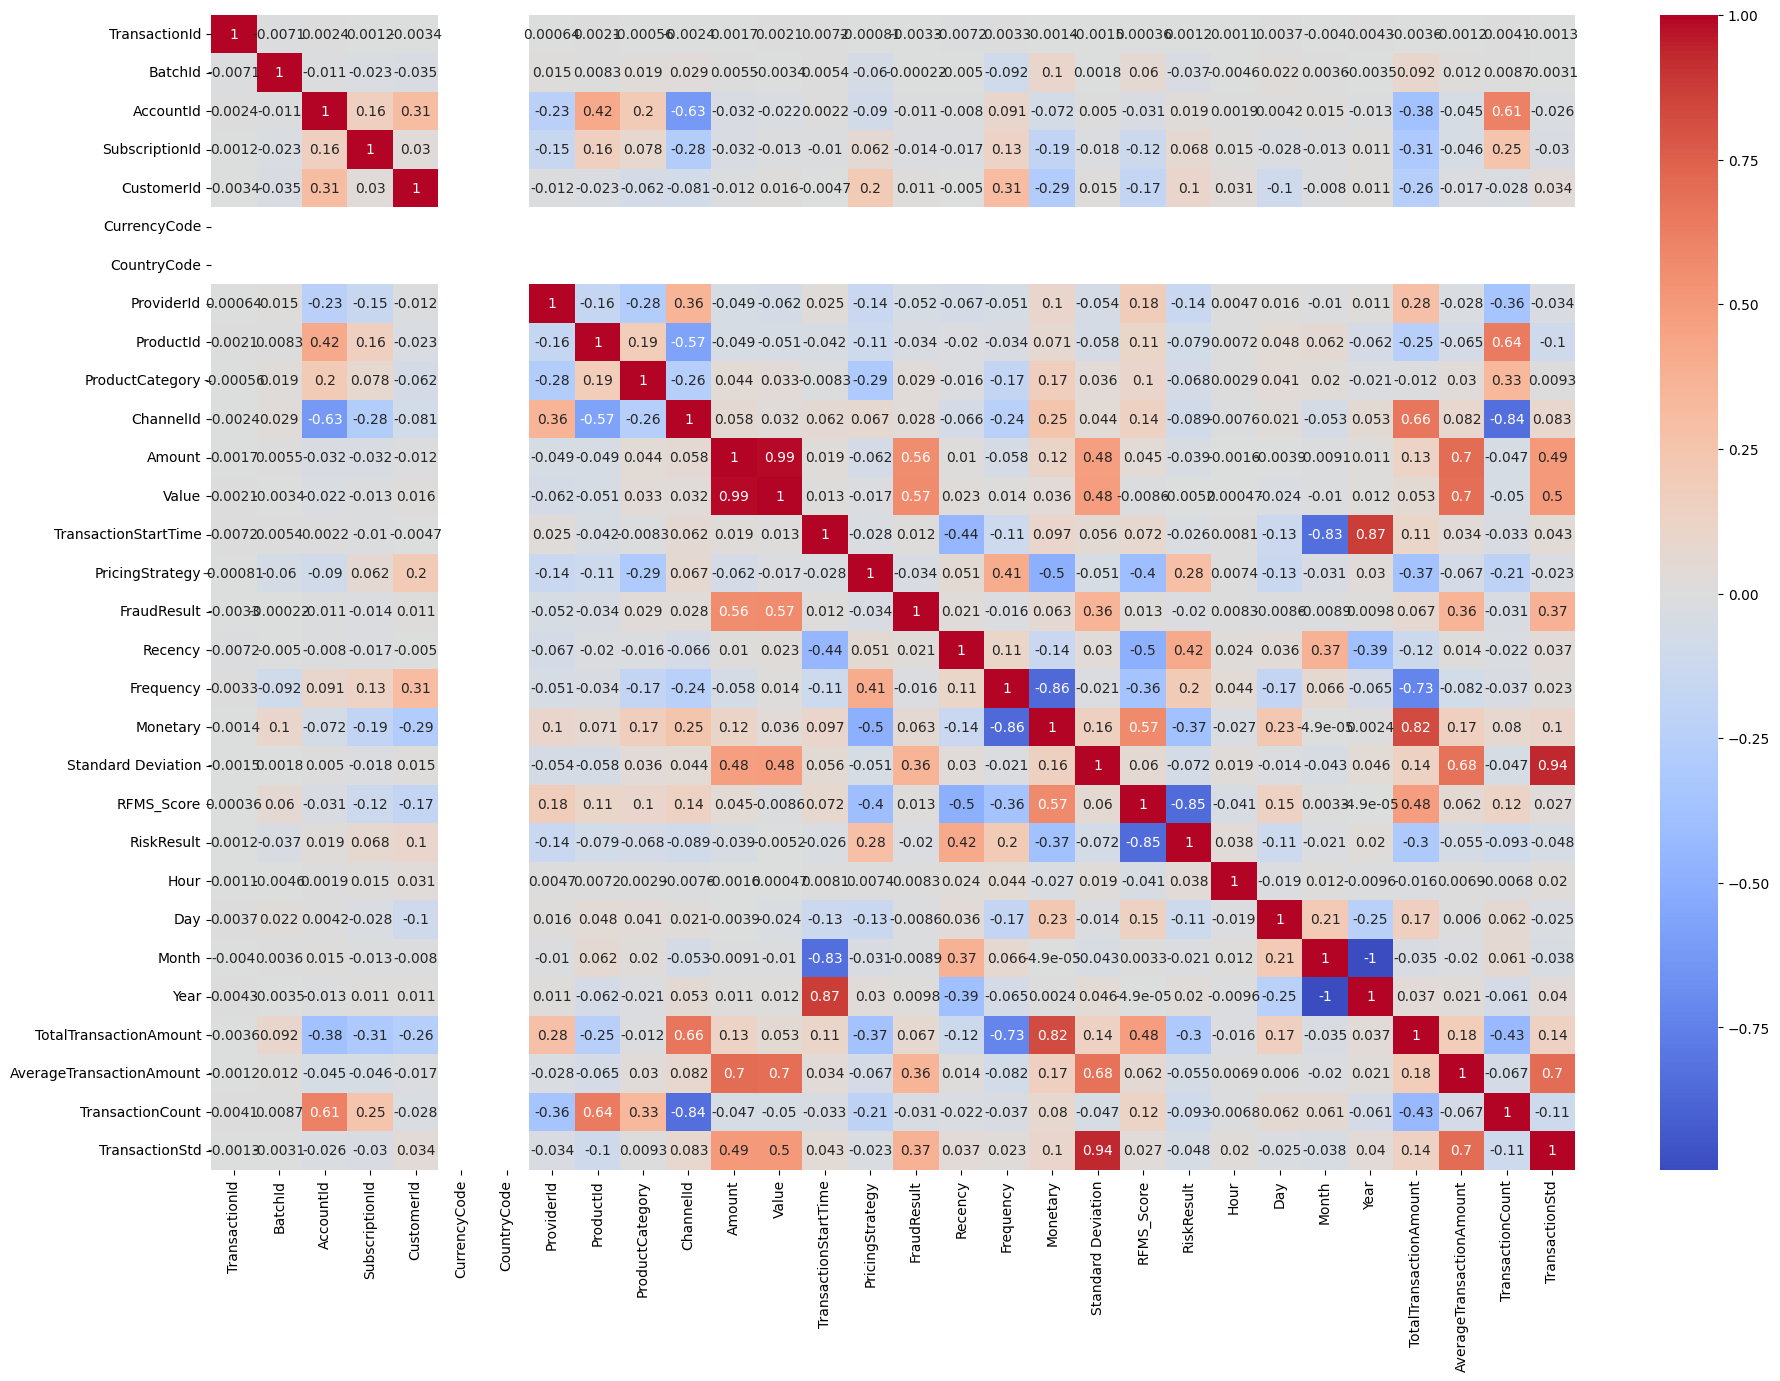

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,15))
sns.heatmap(refined_df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [18]:
model_df=refined_df.drop(['Monetary','TransactionCount','Standard Deviation','TransactionId','BatchId','AccountId','CustomerId','SubscriptionId','CurrencyCode','CountryCode','TransactionStartTime'],axis=1)
model_df

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult,Recency,Frequency,RFMS_Score,RiskResult,Hour,Day,Month,Year,TotalTransactionAmount,AverageTransactionAmount,TransactionStd
0,5,1,0,2,1000.0,1000,2,0,0,119,83.580756,0,2,15,11,2018,156884.0,2377.030303,3146.231284
1,3,19,2,1,-20.0,20,2,0,0,119,83.580756,0,2,15,11,2018,-27750277.5,-898.270725,1845.812752
2,5,0,0,2,500.0,500,2,0,81,2,23.209022,1,2,15,11,2018,1000.0,500.000000,0.000000
3,0,11,8,2,20000.0,21800,2,0,5,38,79.661047,0,3,15,11,2018,251000.0,9653.846154,19707.241933
4,3,19,2,1,-644.0,644,2,0,5,38,79.661047,0,3,15,11,2018,-27750277.5,-898.270725,1845.812752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,3,19,2,1,-1000.0,1000,2,0,0,573,90.151659,0,9,13,2,2019,-27750277.5,-898.270725,1845.812752
95658,5,1,0,2,1000.0,1000,2,0,0,43,75.070252,0,9,13,2,2019,60208.0,2229.925926,2492.887450
95659,3,19,2,1,-20.0,20,2,0,0,43,75.070252,0,9,13,2,2019,-27750277.5,-898.270725,1845.812752
95660,5,8,7,2,3000.0,3000,2,0,0,524,93.811423,0,10,13,2,2019,924919.0,2642.625714,3384.271147


In [19]:
model_df.to_csv('data/model.csv')

In [24]:
class_proba = model1.predict_proba(X_test)[:, 1]
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, class_proba)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, class_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined